<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: kriging standard 1D </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Kriging standard
- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [211]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [213]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 200


# Theoretical variogram 



In [214]:
from phyton_kriging import np, sp, plt

from phyton_kriging.variogram_1D import theoretical
from phyton_kriging.standard_1D import kriging1D

In [215]:
h = np.linspace(0, 10, 1000)


name = gauss

h: min - 0.0, max - 10.0
variogram: min - 0.0001, max - 1.0001
parameters = {'sc': 0.01, 'A': 1, 'lc': 0.25, 'power': None}



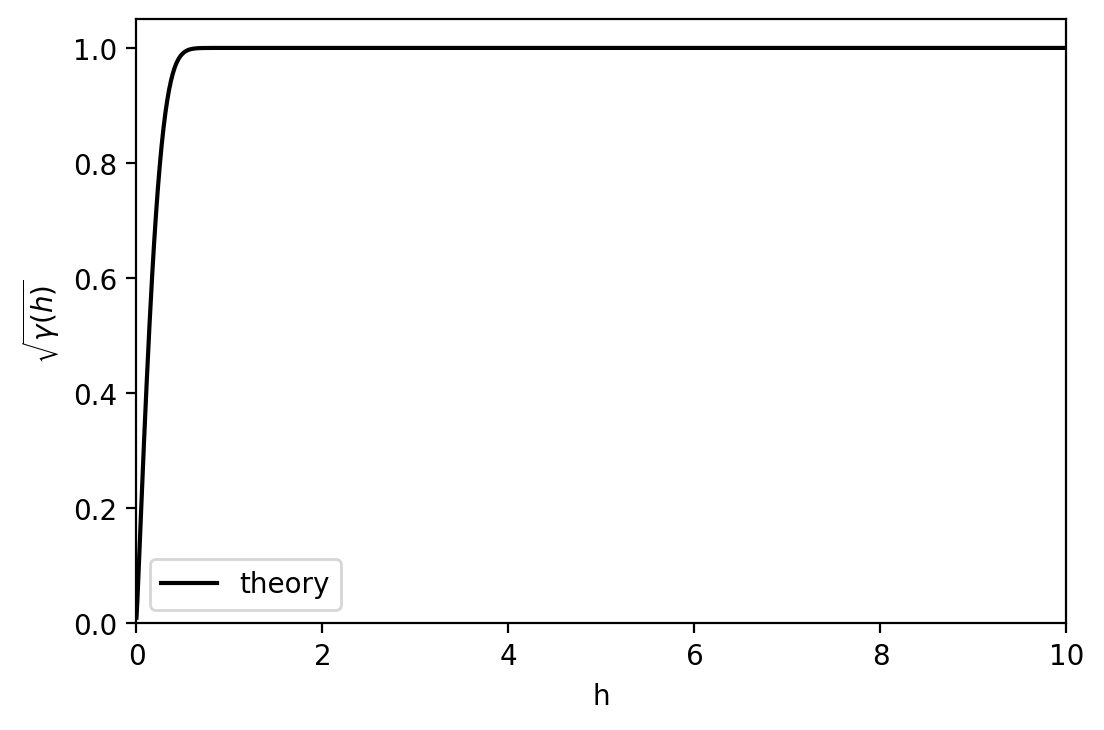

In [229]:
sc = 0.01
I0 = .00001

var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=.25)
var_theo.draw()
print(var_theo)

In [230]:
def f_signal(x, sc=0, I0=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    y=np.cos(2 * np.pi * x / 10)
    y=y + sc * np.random.randn(num_sensors)
    y = y + 2*I0 * (np.random.rand(num_sensors)-0.5)

    return y

In [231]:
num_sampling = 100
sampling = np.linspace(-10, 10, num_sampling)

y_ideal = f_signal(sampling,0,0)


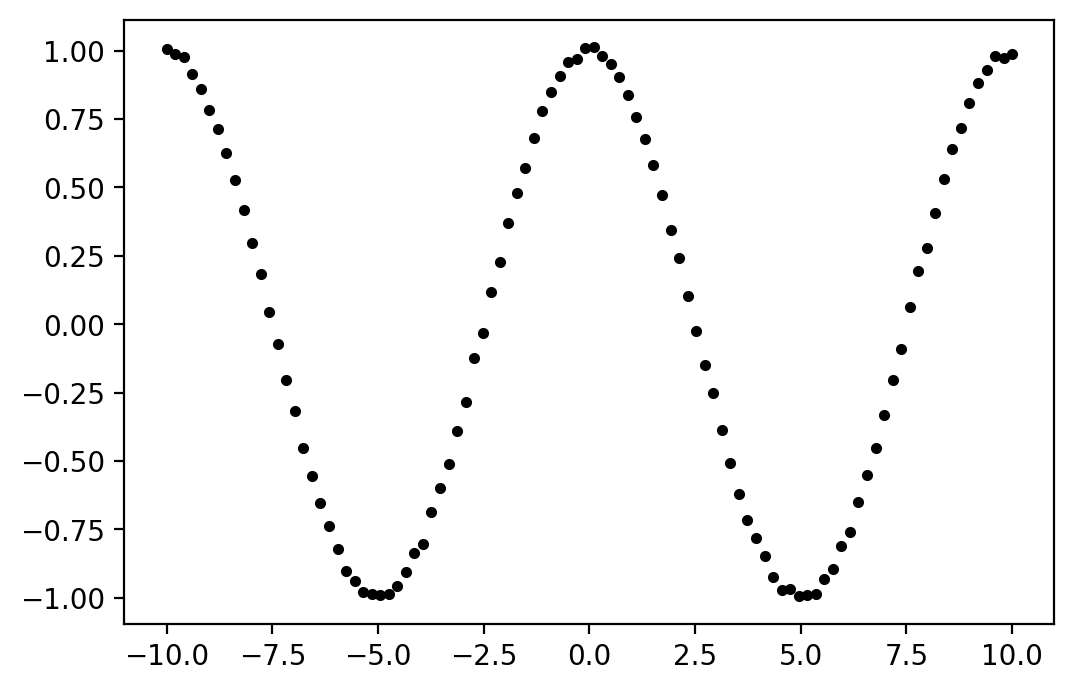

In [232]:
num_sensors = 100

sensors = np.zeros((num_sensors, 3), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
x = np.linspace(-10, 10, num_sensors)

sensors[:, 0] = x
sensors[:, 1] = f_signal(x, sc, I0)
sensors[:, 2] = I0 * np.ones_like(sensors[:, 0])


plt.plot(sensors[:, 0], sensors[:, 1], 'k.')

In [233]:
krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=sampling)


In [234]:
krig1.standard()

error_real = krig1.estimacion - y_ideal

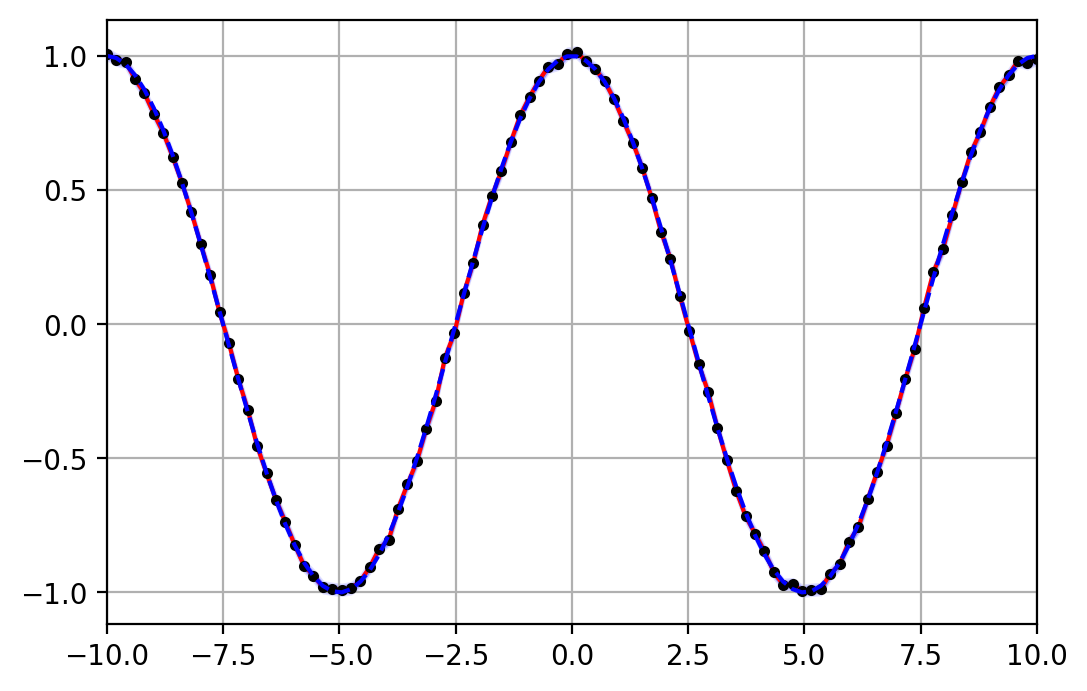

In [235]:
plt.plot(sampling, krig1.estimacion, 'r')
plt.plot(sensors[:, 0], sensors[:, 1], 'k.')
plt.fill_between(sampling, krig1.estimacion - 2*krig1.error, krig1.estimacion + 2*krig1.error, color='blue', alpha=0.125)
plt.fill_between(sampling, krig1.estimacion - krig1.error, krig1.estimacion + krig1.error, color='blue', alpha=0.25)
plt.plot(sampling, y_ideal,'b--')
plt.xlim(sampling[0], sampling[-1])
plt.grid('on')

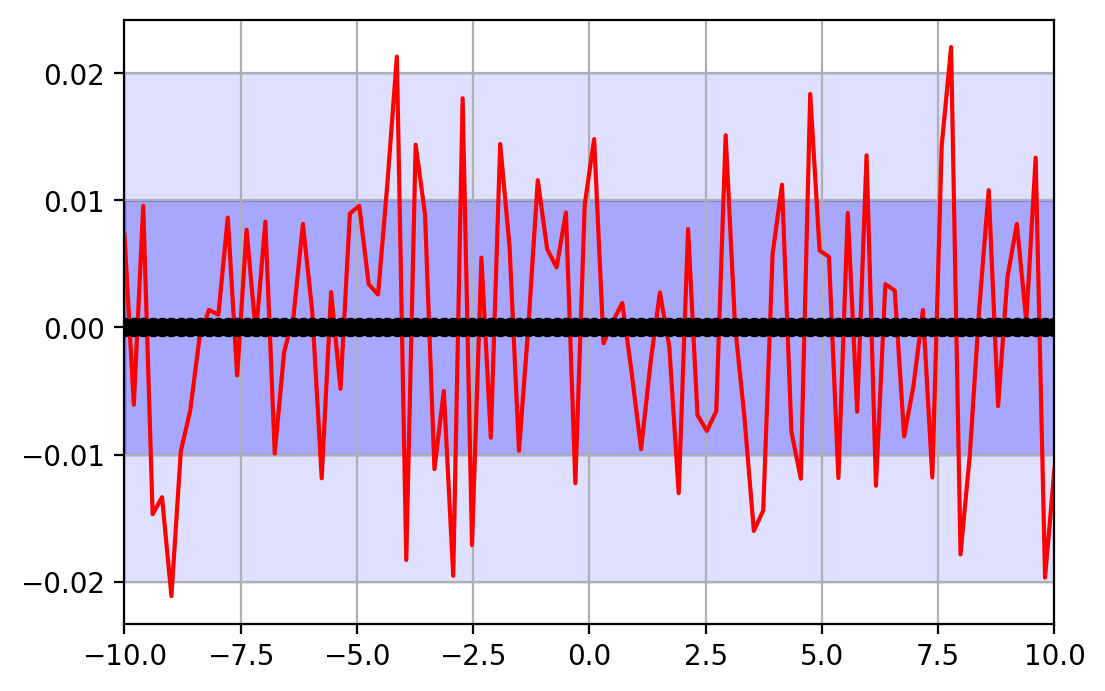

In [236]:
plt.plot(sampling, krig1.estimacion-y_ideal, 'r')
plt.plot(sensors[:, 0], np.zeros_like(sensors[:, 0]), 'ko')

plt.fill_between(sampling, - 2*krig1.error, 2*krig1.error, color='blue', alpha=0.125)
plt.fill_between(sampling, - krig1.error, krig1.error, color='blue', alpha=0.25)
plt.xlim(sampling[0], sampling[-1])
plt.grid('on')

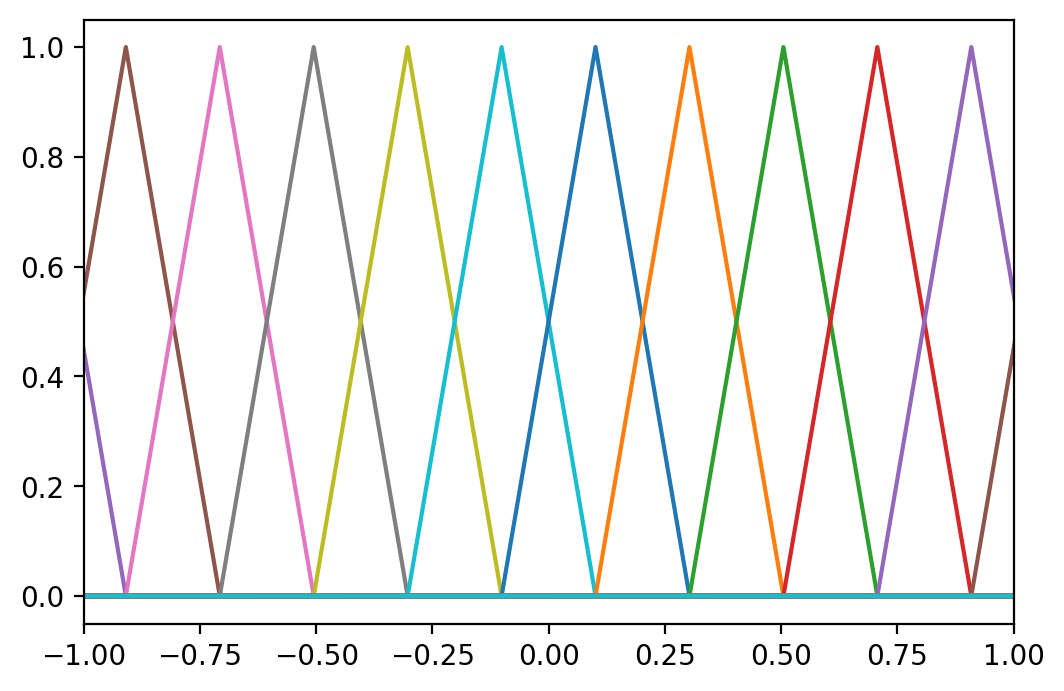

In [242]:
plt.plot(sampling, krig1.lambdas)
plt.xlim(-1,1)

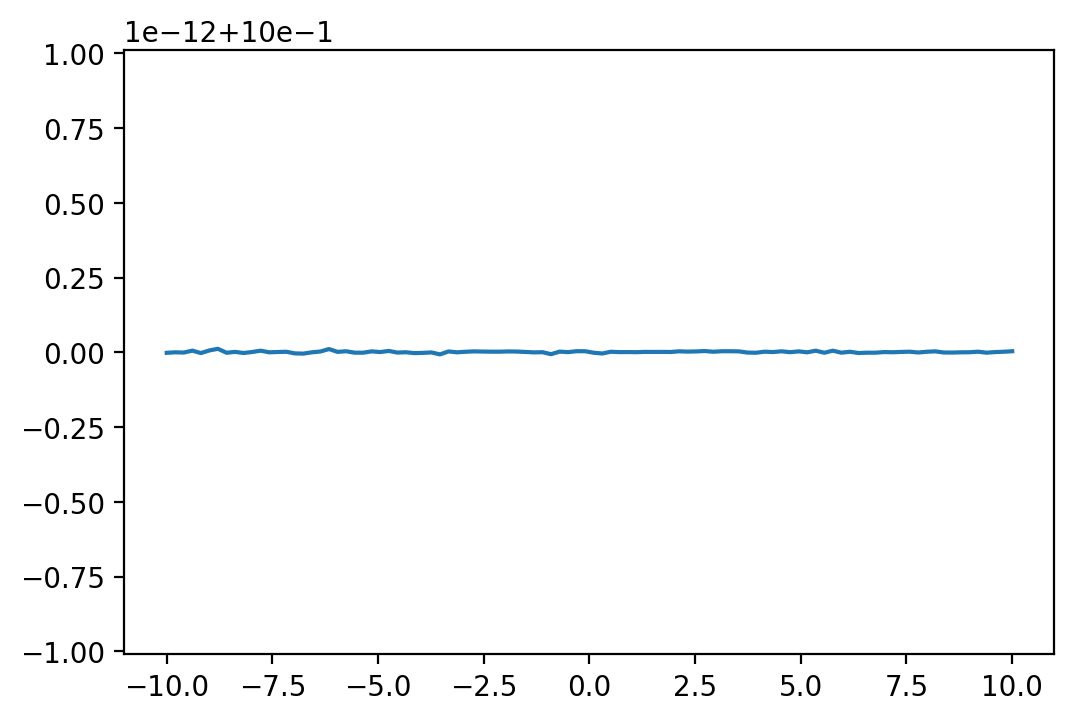

In [238]:
plt.plot(sampling, krig1.lambdas.sum(axis=1))

In [239]:
X, lambda_mean, LAMBDAS = krig1.center_lambdas()

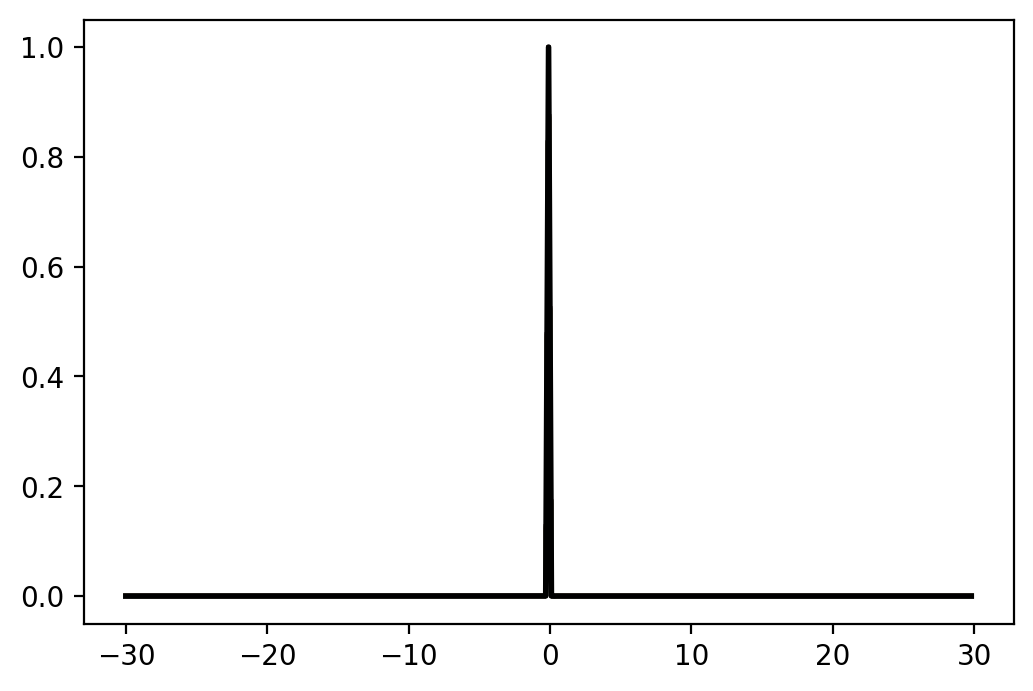

In [240]:
plt.plot(X, LAMBDAS)
plt.plot(X, lambda_mean,'k', lw=2)

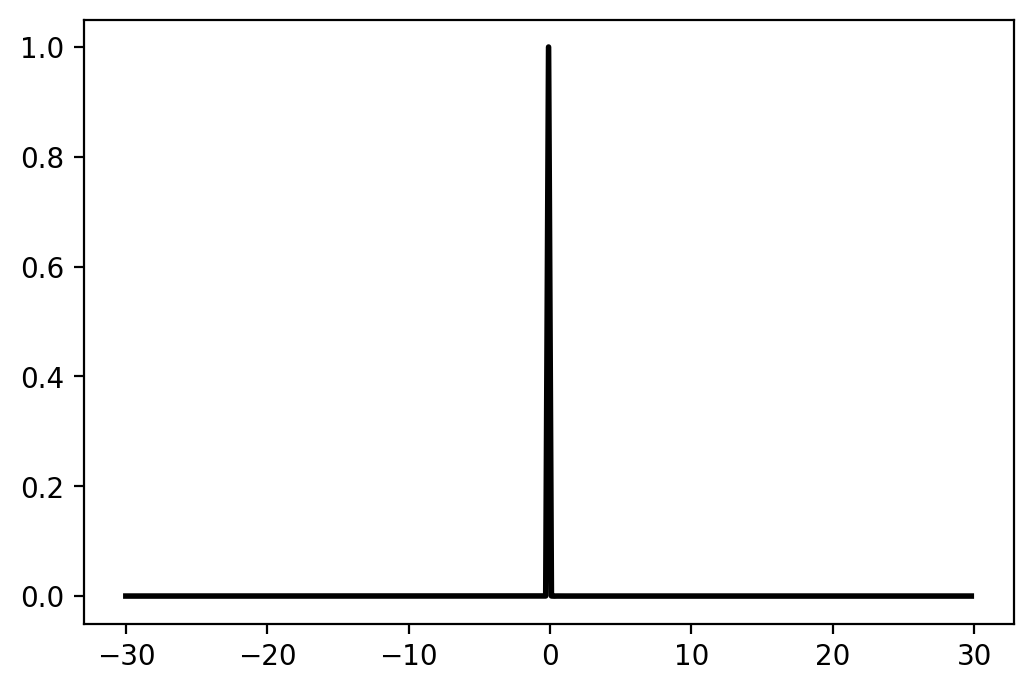

In [241]:
plt.plot(X, lambda_mean, 'k', lw=2)
